<a href="https://colab.research.google.com/github/RohitM2997/Rohit_kaggle-/blob/main/Digaster_nlp_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.preprocessing import LabelEncoder

In [225]:
df.shape

(7613, 7)

In [226]:
df.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0
text_tokenized,0
text_vector,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7613 non-null   int64 
 1   keyword         7613 non-null   object
 2   location        7613 non-null   object
 3   text            7613 non-null   object
 4   target          7613 non-null   int64 
 5   text_tokenized  7613 non-null   object
 6   text_vector     7613 non-null   object
dtypes: int64(2), object(5)
memory usage: 416.5+ KB


In [228]:
df['target'].value_counts()

,count
target,
0,4342
1,3271


([<matplotlib.patches.Wedge at 0x7bd1db9e7ac0>,
 [Text(-0.24110481617711207, 1.0732513534192263, '0'),
  Text(0.24110481617711216, -1.0732513534192263, '1')],
 [Text(-0.13151171791478838, 0.5854098291377597, '57.03'),
  Text(0.13151171791478844, -0.5854098291377597, '42.97')])

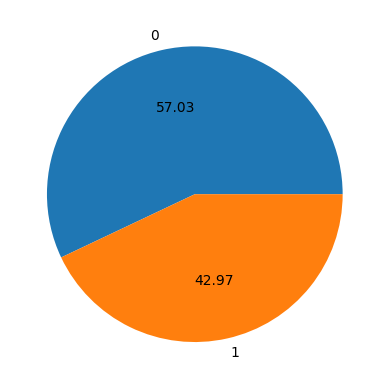

In [229]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['0','1'],autopct='%0.2f')

In [230]:
df = pd.read_csv('train.csv')


df['keyword'] = df['keyword'].fillna("Unknown")
df['location'] = df['location'].fillna("Unknown")

In [231]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models import Word2Vec

In [232]:
df.drop(['keyword', 'location'], axis=1)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [233]:
df["text"] = df["text"].str.lower()


def remove_html_tags(text):
    return re.sub(r"<.*?>", "", text)


def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)


def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)


nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join(lemmatizer.lemmatize(word) for word in text.split())

df['text'] = df['text'].apply(remove_html_tags).apply(remove_url).apply(remove_punctuation).apply(remove_stopwords).apply(lemmatize_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [234]:
import re

def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove any digits
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into words
    words = text.split()
    # Clean each word by removing non-alphabetic characters
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]

    # Remove duplicates while preserving order
    seen = set()
    unique_words = []
    for word in words:
        if word not in seen:
            unique_words.append(word)
            seen.add(word)

    return unique_words


In [235]:
df['text']= df['text'].apply(clean_text)

In [236]:
df['text_tokenized'] = df['text'].apply(lambda x: x)

w2v_model = Word2Vec(
    sentences=df['text_tokenized'],
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=0
)


def get_sentence_vector(sentence, model):

    words = [word for word in sentence if word in model.wv]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in words], axis=0)

df['text_vector'] = df['text_tokenized'].apply(lambda x: get_sentence_vector(x, w2v_model))


X = np.vstack(df['text_vector'].values)
y = df['target'].values


In [237]:
X

array([[-0.08568342,  0.21276094,  0.09523436, ..., -0.21366003,
        -0.00756655, -0.05322396],
       [-0.12002067,  0.30755284,  0.13598493, ..., -0.30521756,
        -0.01869444, -0.07496466],
       [-0.04329238,  0.10247239,  0.04775488, ..., -0.10465542,
        -0.00359182, -0.02329437],
       ...,
       [-0.03478254,  0.0976722 ,  0.04087013, ..., -0.08784299,
        -0.00574241, -0.0207505 ],
       [-0.06140073,  0.16051091,  0.07417519, ..., -0.15601172,
        -0.00663992, -0.03609091],
       [-0.1243832 ,  0.31688082,  0.14579043, ..., -0.3201364 ,
        -0.01830343, -0.07811802]])

In [238]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [241]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [242]:
models = {
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    # "Naive Bayes": MultinomialNB()
}

In [243]:
print("Model Performance Comparison:")

for model_name, model in models.items():
    accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Model Performance Comparison:
Support Vector Machine Accuracy: 0.57
Decision Tree Accuracy: 0.59
Logistic Regression Accuracy: 0.57
Random Forest Accuracy: 0.69
K-Nearest Neighbors Accuracy: 0.63


In [244]:
df1 = pd.read_csv('test.csv')
df1

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [245]:



df1['keyword'] = df1['keyword'].fillna("Unknown")
df1['location'] = df1['location'].fillna("Unknown")

In [246]:
label_keyword = LabelEncoder()
label_location = LabelEncoder()

df1['keyword_encoded'] = label_keyword.fit_transform(df1['keyword'])
df1['location_encoded'] = label_location.fit_transform(df1['location'])


correlation_matrix = df1[['keyword_encoded', 'location_encoded']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  keyword_encoded  location_encoded
keyword_encoded           1.00000           0.00513
location_encoded          0.00513           1.00000


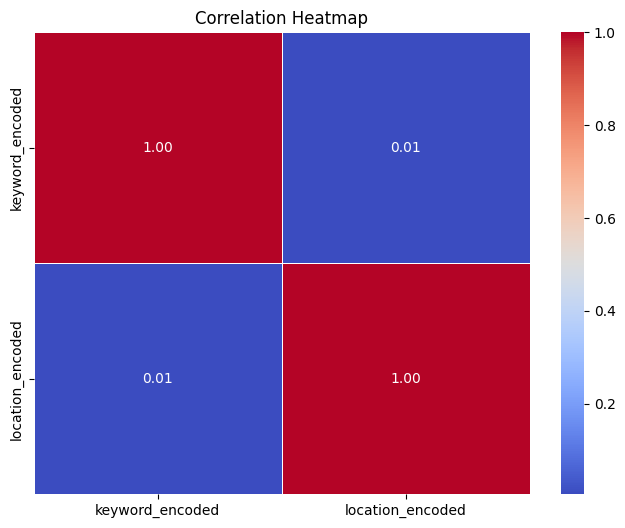

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code
label_keyword = LabelEncoder()
label_location = LabelEncoder()

df1['keyword_encoded'] = label_keyword.fit_transform(df1['keyword'])
df1['location_encoded'] = label_location.fit_transform(df1['location'])

# Calculate the correlation matrix
correlation_matrix = df1[['keyword_encoded', 'location_encoded']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [248]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models import Word2Vec

In [249]:

def remove_html_tags(text):
    pattern = re.compile("<.*?>")
    return pattern.sub(r"", text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r"", text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join(word for word in text.split() if word not in stop_words)

def stem_words(text):
    ps = PorterStemmer()
    return " ".join([ps.stem(word) for word in text.split()])

import nltk
nltk.download('wordnet')

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


df1['keyword'] = df1['keyword'].str.lower()
df1['keyword'] = df1['keyword'].apply(remove_html_tags)
df1['keyword'] = df1['keyword'].apply(remove_url)
df1['keyword'] = df1['keyword'].apply(remove_punctuation)
df1['keyword'] = df1['keyword'].apply(remove_stopwords)
df1['keyword'] = df1['keyword'].apply(stem_words)
df1['keyword'] = df1['keyword'].apply(lemmatize_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [250]:
import re

def clean_text(text):
    # Remove special characters (e.g., \x89ûò)
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove any digits
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Split the text into words
    words = text.split()
    # Remove any non-alphabetic characters from each word
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]
    return words

In [251]:
df1['keyword']= df1['keyword'].apply(clean_text)

In [252]:
df1["text"] = df1["text"].str.lower()


def remove_html_tags(text):
    return re.sub(r"<.*?>", "", text)


def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)


def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)


nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join(lemmatizer.lemmatize(word) for word in text.split())

df1['text'] = df1['text'].apply(remove_html_tags).apply(remove_url).apply(remove_punctuation).apply(remove_stopwords).apply(lemmatize_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [253]:
import re

def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove any digits
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into words
    words = text.split()
    # Clean each word by removing non-alphabetic characters
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]

    # Remove duplicates while preserving order
    seen = set()
    unique_words = []
    for word in words:
        if word not in seen:
            unique_words.append(word)
            seen.add(word)

    return unique_words

In [254]:
df1['text']= df1['text'].apply(clean_text)

In [255]:
df1['text_tokenized'] = df1['text'].apply(lambda x: x)

w2v_model = Word2Vec(
    sentences=df['text_tokenized'],
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=0
)


def get_sentence_vector(sentence, model):

    words = [word for word in sentence if word in model.wv]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in words], axis=0)

df1['text_vector'] = df1['text_tokenized'].apply(lambda x: get_sentence_vector(x, w2v_model))


In [256]:
df1

,id,keyword,location,text,keyword_encoded,location_encoded,text_tokenized,text_vector
0,0,[unknown],Unknown,"[happened, terrible, car, crash]",0,1300,"[happened, terrible, car, crash]","[-0.11958957, 0.25291812, 0.16041803, -0.00622..."
1,2,[unknown],Unknown,"[heard, earthquake, different, city, stay, saf...",0,1300,"[heard, earthquake, different, city, stay, saf...","[-0.071690716, 0.1502502, 0.088507004, -0.0049..."
2,3,[unknown],Unknown,"[forest, fire, spot, pond, goose, fleeing, acr...",0,1300,"[forest, fire, spot, pond, goose, fleeing, acr...","[-0.07866382, 0.1577411, 0.09662725, -0.005527..."
3,9,[unknown],Unknown,"[apocalypse, lighting, spokane, wildfire]",0,1300,"[apocalypse, lighting, spokane, wildfire]","[-0.066813506, 0.13411836, 0.088948585, -0.004..."
4,11,[unknown],Unknown,"[typhoon, soudelor, kill, china, taiwan]",0,1300,"[typhoon, soudelor, kill, china, taiwan]","[-0.07085018, 0.14499287, 0.08979045, -0.00340..."
...,...,...,...,...,...,...,...,...
3258,10861,[unknown],Unknown,"[earthquake, safety, los, angeles, , fastener,...",0,1300,"[earthquake, safety, los, angeles, , fastener,...","[-0.06957488, 0.1559386, 0.094574295, -0.00600..."
3259,10865,[unknown],Unknown,"[storm, ri, worse, last, hurricane, cityampoth...",0,1300,"[storm, ri, worse, last, hurricane, cityampoth...","[-0.11511483, 0.23437922, 0.14186232, -0.00129..."
3260,10868,[unknown],Unknown,"[green, line, derailment, chicago]",0,1300,"[green, line, derailment, chicago]","[-0.055426996, 0.11328957, 0.062315017, -0.003..."
3261,10874,[unknown],Unknown,"[meg, issue, hazardous, weather, outlook, hwo]",0,1300,"[meg, issue, hazardous, weather, outlook, hwo]","[-0.057272267, 0.11531421, 0.0653656, -0.00345..."


In [257]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [258]:
y = pd.read_csv('sample_submission.csv')
y

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1523, 3263]

In [ ]:
X_test = np.vstack(df1['text_vector'].values)
y = y['target'].values

In [ ]:
X_test.shape

In [ ]:
y.shape

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train, y_train, X_test, y):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Since `y` is your sample submission, assuming it contains the true labels for testing
    accuracy = accuracy_score(y, y_pred)  # Compare predictions with actual labels (y)

    return accuracy


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X, X_test)
    y_pred = model.predict(y)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
models = {
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    # "Naive Bayes": MultinomialNB()
}

In [ ]:
print("Model Performance Comparison:")

for model_name, model in models.items():
    accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{model_name} Accuracy: {accuracy:.2f}")